<a href="https://colab.research.google.com/github/StellaIbeh/derma_assist_project/blob/main/DermAssist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Install kagglehub (quietly)
!pip install kagglehub --quiet

# Import kagglehub and download the dataset
import kagglehub

# This will download and extract the dataset into a local Colab path
# Corrected the function name from download_dataset to dataset_download
dataset_path = kagglehub.dataset_download("muhammadabdulsami/massive-skin-disease-balanced-dataset")

# Verify the contents
import os
print("Dataset downloaded to:", dataset_path)
print("Top-level contents:", os.listdir(dataset_path))

Dataset downloaded to: /kaggle/input/massive-skin-disease-balanced-dataset
Top-level contents: ['balanced_dataset.csv', 'balanced_dataset']


In [21]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Use the dataset_path from kagglehub.dataset_download
dataset_path = kagglehub.dataset_download("muhammadabdulsami/massive-skin-disease-balanced-dataset")

 # Remove or comment out this line

#  image transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize images
    transforms.ToTensor(),          # Convert to PyTorch tensors
])

# Load dataset (ImageFolder automatically assigns labels based on subfolders)
# Use the dataset_path variable that holds the correct path to the downloaded dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

In [22]:
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [24]:
import os

# Where your kagglehub download landed
dataset_path = kagglehub.dataset_download("muhammadabdulsami/massive-skin-disease-balanced-dataset")

# List all folders (each is a disease class) by filtering for directories
# Added a check to ensure only directories are included in all_classes
all_classes = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
print("All classes:", all_classes)

# Count how many images per class
# This line remains the same as it now iterates over the filtered list of directories
counts = {cls: len(os.listdir(os.path.join(dataset_path, cls)))
          for cls in all_classes}
print("Image counts per class:", counts)

All classes: ['balanced_dataset']
Image counts per class: {'balanced_dataset': 1}


In [33]:
# Check the number of samples in the dataset
print("Number of samples in the dataset:", len(dataset))

# If you want to see the shape of a single image after transformation:
# Assuming dataset is not empty, get the first image and its label
# first_image, first_label = dataset[0]
# print("Shape of the first image:", first_image.shape)

Number of samples in the dataset: 262874


In [49]:
#list the name of classes
print("Classes:", dataset.classes)
print(balanced_dataset)

Classes: ['balanced_dataset']


NameError: name 'balanced_dataset' is not defined

In [50]:
#list the name of classes
print("Classes:", dataset.classes)
# Remove or comment out the line below as balanced_dataset is not defined
# print(balanced_dataset)

Classes: ['balanced_dataset']


In [ ]:
# Example: Create a DataLoader (assuming batch_size is defined)
# Define batch_size, for example:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Iterate over the DataLoader to get a batch of data
for images, labels in train_loader:
    # Check the shape of the images batch
    print("Shape of the image batch:", images.shape)
    # Break after the first batch if you just want to see the shape
    break

In [40]:
# Check the number of samples in the dataset instead of accessing 'data.shape'
print("Number of samples in the dataset:", len(dataset))
# Check the number of samples in the dataset instead of accessing 'data.shape'
print("Number of samples in the dataset:", len(dataset))

# If you want to see the shape of a single image after transformation:
# Assuming dataset is not empty, get the first image and its label
first_image, first_label = dataset[0]
print("Shape of the first image:", first_image.shape)

Number of samples in the dataset: 262874
Number of samples in the dataset: 262874
Shape of the first image: torch.Size([3, 150, 150])


In [51]:
from collections import Counter
import matplotlib.pyplot as plt

# If using ImageFolder
class_counts = Counter([lbl for _, lbl in full_train.samples])
idx_to_class = {v: k for k, v in full_train.class_to_idx.items()}
labels = [idx_to_class[idx] for idx in class_counts.keys()]
counts = list(class_counts.values())

plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.title("Class Distribution (Train set)")
plt.xticks(rotation=45)
plt.ylabel("Image Count")
plt.show()

NameError: name 'full_train' is not defined

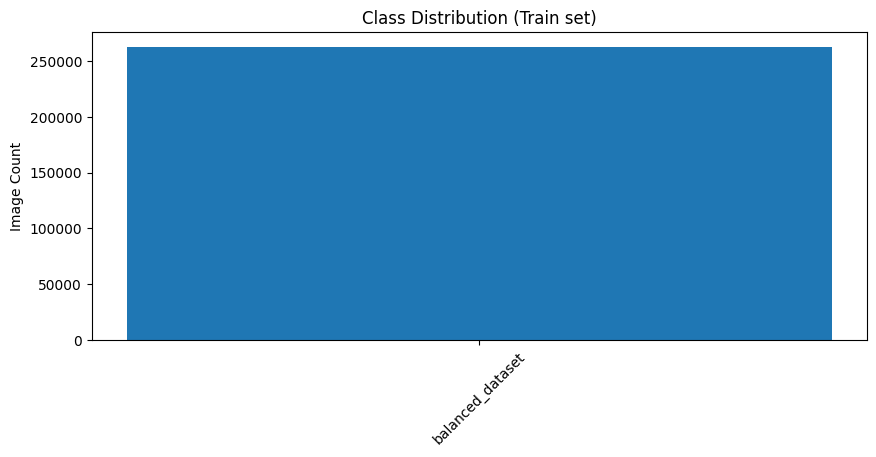

In [52]:
from collections import Counter
import matplotlib.pyplot as plt

# If using ImageFolder
# Use the correct variable name for the training dataset
class_counts = Counter([lbl for _, lbl in train_dataset.dataset.samples])
idx_to_class = {v: k for k, v in train_dataset.dataset.class_to_idx.items()}
labels = [idx_to_class[idx] for idx in class_counts.keys()]
counts = list(class_counts.values())

plt.figure(figsize=(10,4))
plt.bar(labels, counts)
plt.title("Class Distribution (Train set)")
plt.xticks(rotation=45)
plt.ylabel("Image Count")
plt.show()

In [53]:
import random
import numpy as np

n_classes = len(selected_classes)
plt.figure(figsize=(15, 2.5 * n_classes))

for i, cls in enumerate(selected_classes):
    # Get indices of samples with label == this class
    class_idx = full_train.class_to_idx[cls]
    class_samples = [s[0] for s in full_train.samples if s[1] == class_idx]
    # Randomly pick up to 5 images per class
    sample_imgs = random.sample(class_samples, min(5, len(class_samples)))
    for j, img_path in enumerate(sample_imgs):
        img = plt.imread(img_path)
        plt.subplot(n_classes, 5, i*5 + j + 1)
        plt.imshow(img)
        plt.title(cls if j == 0 else "")
        plt.axis("off")
plt.tight_layout()
plt.show()


<Figure size 1500x0 with 0 Axes>

In [54]:
sizes = []
for img_path, _ in full_train.samples:
    img = plt.imread(img_path)
    sizes.append(img.shape[:2])

heights = [s[0] for s in sizes]
widths  = [s[1] for s in sizes]

plt.hist(heights, bins=30, alpha=0.7, label='Heights')
plt.hist(widths, bins=30, alpha=0.7, label='Widths')
plt.title("Distribution of Image Sizes")
plt.legend()
plt.show()


NameError: name 'full_train' is not defined